# SI: Anomalous Fibril Length Dependence on Amyloid Adsorption to Charged Interfaces

_Giulio Tesei, Erik Hellstrand, Sara Linse, Emma Sparr, Robert Vacha, Mikael Lund_

### System Requirements
This Jupyter Notebook was originally run in MacOS 10.11 with `GCC 4.8`, `cmake`, `Python2`, `matplotlib`, `pandas` within the Anaconda environment. Contemporary Linux distributions such as Ubuntu 14.04 will also work.

### Download Faunus; Go to past version; Build custom executable

To simulate the interaction of rigid fibrils with a charged, planar surface we use a custom Metropolis Monte Carlo (MC) program build within the [Faunus framework](http://github.com/mlund/faunus.git). The sections below will fetch the complete faunus project and compile the program.

In [2]:
from __future__ import division, unicode_literals, print_function
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np, pandas as pd
import os.path, os, sys, json
plt.rcParams.update({'font.size': 16, 'figure.figsize': [8.0, 6.0]})
try:
    workdir
except NameError:
    workdir=%pwd
else:
    %cd $workdir

In [41]:
%%bash -s "$workdir"
cd $1
if [ ! -d "faunus/" ]; then
  git clone https://github.com/mlund/faunus.git
  cd faunus
  git checkout dfdddf3
else
  cd faunus
fi
cmake . -DCMAKE_BUILD_TYPE=Release -DENABLE_APPROXMATH=on -DMYPLAYGROUND=`pwd`/../mc/ &>/dev/null
make r2s -j4

[ 40%] Built target xdrfile
[ 90%] Built target libfaunus
[100%] Built target r2s


### Create slurm submit script for cluster runs
This part is only for performing the calculations on a cluster, here assumed to use slurm for submitting jobs. Below you specify number of processers (1), cores (1) and wall time for each job to be submitted.

In [28]:
%cd $workdir

/lunarc/nobackup/users/mikael/github/faunus-notebooks/fibril-surface


In [30]:
%%writefile mc/submit.sh
#!/bin/bash
#SBATCH -N 1
#SBATCH -n 1
#SBATCH -t 01:00:00
../r2s > out

Overwriting mc/submit.sh


### Create Input and run MC simulation

This will generate all input for the simulations as well as looping over the full parameter space. In the inner loop you may specify if the jobs should be run locally (not recommended) or be submitted to a cluster, assuming you're running this Notebook from a cluster environment.

In [32]:
%cd $workdir
js = {
  "processes" :
  {
    "H-Asp" : { "bound":"HASP" , "free":"ASP" , "pKd":4.0  , "pX":4.1 },
    "H-Ctr" : { "bound":"HCTR" , "free":"CTR" , "pKd":2.6  , "pX":4.1 },
    "H-Glu" : { "bound":"HGLU" , "free":"GLU" , "pKd":4.4  , "pX":4.1 },
    "H-His" : { "bound":"HHIS" , "free":"HIS" , "pKd":6.3  , "pX":4.1 },
    "H-Arg" : { "bound":"HARG" , "free":"ARG" , "pKd":12.0 , "pX":4.1 },
    "H-Ntr" : { "bound":"HNTR" , "free":"NTR" , "pKd":7.5  , "pX":4.1 },
    "H-Cys" : { "bound":"HCYS" , "free":"CYS" , "pKd":10.8 , "pX":4.1 },
    "H-Tyr" : { "bound":"HTYR" , "free":"TYR" , "pKd":9.6  , "pX":4.1 },
    "H-Lys" : { "bound":"HLYS" , "free":"LYS" , "pKd":10.4 , "pX":4.1 }
  },

  "atomlist" :
  {
    "Na"   :  { "q": 1, "r":1.9, "mw":22.99 },
    "Cl"   :  { "q":-1, "r":1.7, "mw":35.45 },
    "I"    :  { "q":-1, "r":2.0, "mw":1 },
    "SCN"  :  { "q":-1, "r":2.0, "mw":1 },
    "ASP"  :  { "q":-1, "r":3.6, "mw":110 },
    "HASP" :  { "q":0,  "r":3.6, "mw":110 },
    "LASP" :  { "q":2,  "r":3.6, "mw":110 },
    "CTR"  :  { "q":-1, "r":2.0, "mw":16 },
    "HCTR" :  { "q":0,  "r":2.0, "mw":16 },
    "GLU"  :  { "q":-1, "r":3.8, "mw":122 },
    "HGLU" :  { "q":0,  "r":3.8, "mw":122 },
    "LGLU" :  { "q":2,  "r":3.8, "mw":122 },
    "HIS"  :  { "q":0,  "r":3.9, "mw":130 },
    "HHIS" :  { "q":1,  "r":3.9, "mw":130 },
    "NTR"  :  { "q":0,  "r":2.0, "mw":14 },
    "HNTR" :  { "q":1,  "r":2.0, "mw":14 },
    "TYR"  :  { "q":-1, "r":4.1, "mw":154 },
    "HTYR" :  { "q":0,  "r":4.1, "mw":154 },
    "LYS"  :  { "q":0,  "r":3.7, "mw":116 },
    "HLYS" :  { "q":1,  "r":3.7, "mw":116 },
    "CYS"  :  { "q":-1, "r":3.6, "mw":103 },
    "HCYS" :  { "q":0,  "r":3.6, "mw":103 },
    "ARG"  :  { "q":0,  "r":4.0, "mw":144 },
    "HARG" :  { "q":1,  "r":4.0, "mw":144 },
    "ALA"  :  { "q":0,  "r":3.1, "mw":66 },
    "ILE"  :  { "q":0,  "r":3.6, "mw":102 },
    "LEU"  :  { "q":0,  "r":3.6, "mw":102 },
    "MET"  :  { "q":0,  "r":3.8, "mw":122 },
    "PHE"  :  { "q":0,  "r":3.9, "mw":138 },
    "PRO"  :  { "q":0,  "r":3.4, "mw":90 },
    "TRP"  :  { "q":0,  "r":4.3, "mw":176 },
    "VAL"  :  { "q":0,  "r":3.4, "mw":90 },
    "SER"  :  { "q":0,  "r":3.3, "mw":82 },
    "THR"  :  { "q":0,  "r":3.5, "mw":94 },
    "ASN"  :  { "q":0,  "r":3.6, "mw":108 },
    "GLN"  :  { "q":0,  "r":3.8, "mw":120 },
    "GLY"  :  { "q":0,  "r":2.9, "mw":54 }
  }
}
with open('mc/slitpolymer.json', 'w+') as f:
    f.write(json.dumps(js, indent=4))

def mkinput():
    d = {
        'atomlist':               '../slitpolymer.json',
        'loop_macrosteps':        10,
        'loop_microsteps':        micro,
        'temperature':            298,     # Kelvin
        'epsilon_r':              78.9,    # Water dielectric const
        'dh_ionicstrength':       salt,    # mol/l
        'gouychapman_qarea':      rho,     # unitless i.e. e*phi/kT
        'gouychapman_linearize':  'yes',
        'gouychapman_offset':     3,
        'cuboid_len':             -1, # Box side length Angstrom
        'cuboid_xlen':            2000,
        'cuboid_ylen':            2000,
        'cuboid_zlen':            500,
        'transrot_transdp':       100,     # Molecular translation parameter
        'transrot_rotdp':         6,      # Molecular rotation parameter
        'oligomer':               '../orderedrod.aam',
        'numpep':                 numpep
    }
    f = open('r2s.input', 'w')
    for key,val in d.iteritems():
        f.write('%-30s %s\n' %(key, val))
    f.close()

%cd $workdir'/mc'
micro=20000000
for rho in [266]:
    for salt in [0.06, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 1e10]:
        for numpep in [2, 4, 8, 16, 32, 64, 128]:
            pfx='__rho'+str(rho)+'-N'+str(numpep)+'-I'+str(salt)
            if not os.path.isdir(pfx):
                %mkdir -p $pfx 
                %cd $pfx
                mkinput()
                
                # if running locally:
                #../r2s > out
                
                # if running on slurm cluster:
                !sbatch ../submit.sh 
                
                %cd ..

/lunarc/nobackup/users/mikael/github/faunus-notebooks/fibril-surface
/lunarc/nobackup/users/mikael/github/faunus-notebooks/fibril-surface/mc
/lunarc/nobackup/users/mikael/github/faunus-notebooks/fibril-surface/mc/rho266-N2-I0.06
Submitted batch job 86793
/lunarc/nobackup/users/mikael/github/faunus-notebooks/fibril-surface/mc


### Read all Distribution Functions and Calculate Surface Excess

We now load all distribution functions into a pandas object for further analysis.

In [34]:
d = {}
rho=266
for salt in [0.06, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 1e10]:
    d[salt] = {}
    for numpep in [2, 4, 8, 16, 32, 64, 128]:
        pfx='__rho'+str(rho)+'-N'+str(numpep)+'-I'+str(salt)
        
        distfile=pfx+'/cmdist.dat'
        if os.path.isfile(distfile): 
        
            r, P = np.loadtxt(distfile, unpack=True) # load data set
            w = -np.log(P) # potential of mean force (PMF)
        
            # normalize such that w(r)->0 for large r
            m = (r>200) & (r<220)
            if len(w[m])>0:
                w = w - w[m].mean()

                # remove tail
                w = w[r<200]
                r = r[r<200]
            
                # integrate PMF to surface excess
                gamma = np.trapz( np.expm1(-w), r  )
        
                d[salt][numpep] = [r, w, gamma]
    
    if len(d[salt])>0:
        d[salt] = pd.Series(d[salt])

data = pd.DataFrame(d)
data = data.rename(columns={1e10: r'$\infty$'})
data

,0.06,0.08,0.1,0.15,0.2,0.25,0.27,0.3,$\infty$
2,"[[7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4, 8.6,...","[[7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4, 8.6,...","[[7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4, 8.6,...","[[7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4, 8.6,...","[[7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4, 8.6,...","[[7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4, 8.6,...","[[7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4, 8.6,...","[[7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4, 8.6,...","[[7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4, 8.6,..."
4,"[[9.2, 9.4, 9.6, 9.8, 10.0, 10.2, 10.4, 10.6, ...","[[9.4, 9.6, 9.8, 10.0, 10.2, 10.4, 10.6, 10.8,...","[[9.4, 9.6, 9.8, 10.0, 10.2, 10.4, 10.6, 10.8,...","[[9.4, 9.6, 9.8, 10.0, 10.2, 10.4, 10.6, 10.8,...","[[9.4, 9.6, 9.8, 10.0, 10.2, 10.4, 10.6, 10.8,...","[[9.2, 9.4, 9.6, 9.8, 10.0, 10.2, 10.4, 10.6, ...","[[9.4, 9.6, 9.8, 10.0, 10.2, 10.4, 10.6, 10.8,...","[[9.2, 9.4, 9.6, 9.8, 10.0, 10.2, 10.4, 10.6, ...","[[9.4, 9.6, 9.8, 10.0, 10.2, 10.4, 10.6, 10.8,..."
8,"[[13.4, 13.6, 13.8, 14.0, 14.2, 14.4, 14.6, 14...","[[13.4, 13.6, 13.8, 14.0, 14.2, 14.4, 14.6, 14...","[[13.4, 13.6, 13.8, 14.0, 14.2, 14.4, 14.6, 14...","[[13.4, 13.6, 13.8, 14.0, 14.2, 14.4, 14.6, 14...","[[13.4, 13.6, 13.8, 14.0, 14.2, 14.4, 14.6, 14...","[[13.4, 13.6, 13.8, 14.0, 14.2, 14.4, 14.6, 14...","[[13.4, 13.6, 13.8, 14.0, 14.2, 14.4, 14.6, 14...","[[13.4, 13.6, 13.8, 14.0, 14.2, 14.4, 14.6, 14...","[[13.4, 13.6, 13.8, 14.0, 14.2, 14.4, 14.6, 14..."
16,"[[19.0, 19.2, 19.4, 19.6, 19.8, 20.0, 20.2, 20...","[[19.0, 19.2, 19.4, 19.6, 19.8, 20.0, 20.2, 20...","[[19.0, 19.2, 19.4, 19.6, 19.8, 20.0, 20.2, 20...","[[19.0, 19.2, 19.4, 19.6, 19.8, 20.0, 20.2, 20...","[[19.0, 19.2, 19.4, 19.6, 19.8, 20.0, 20.2, 20...","[[19.0, 19.2, 19.4, 19.6, 19.8, 20.0, 20.2, 20...","[[19.0, 19.2, 19.4, 19.6, 19.8, 20.0, 20.2, 20...","[[19.0, 19.2, 19.4, 19.6, 19.8, 20.0, 20.2, 20...","[[19.0, 19.2, 19.4, 19.6, 19.8, 20.0, 20.2, 20..."
32,"[[20.2, 20.4, 20.6, 20.8, 21.0, 21.2, 21.4, 21...","[[20.2, 20.4, 20.6, 20.8, 21.0, 21.2, 21.4, 21...","[[20.2, 20.4, 20.6, 20.8, 21.0, 21.2, 21.4, 21...","[[20.2, 20.4, 20.6, 20.8, 21.0, 21.2, 21.4, 21...","[[20.4, 20.6, 20.8, 21.0, 21.2, 21.4, 21.6, 21...","[[20.2, 20.4, 20.6, 20.8, 21.0, 21.2, 21.4, 21...","[[20.2, 20.4, 20.6, 20.8, 21.0, 21.2, 21.4, 21...","[[20.4, 20.6, 20.8, 21.0, 21.2, 21.4, 21.6, 21...","[[20.2, 20.4, 20.6, 20.8, 21.0, 21.2, 21.4, 21..."
64,NaN,NaN,"[[20.8, 21.0, 21.2, 21.4, 21.6, 21.8, 22.0, 22...","[[20.8, 21.0, 21.2, 21.4, 21.6, 21.8, 22.0, 22...","[[20.8, 21.0, 21.2, 21.4, 21.6, 21.8, 22.0, 22...","[[20.8, 21.0, 21.2, 21.4, 21.6, 21.8, 22.0, 22...","[[20.8, 21.0, 21.2, 21.4, 21.6, 21.8, 22.0, 22...","[[20.8, 21.0, 21.2, 21.4, 21.6, 21.8, 22.0, 22...","[[21.0, 21.2, 21.4, 21.6, 21.8, 22.0, 22.2, 22..."
128,NaN,"[[23.2, 23.4, 23.6, 23.8, 24.0, 24.2, 24.4, 24...","[[23.0, 23.2, 23.4, 23.6, 23.8, 24.0, 24.2, 24...","[[23.0, 23.2, 23.4, 23.6, 23.8, 24.0, 24.2, 24...","[[23.2, 23.4, 23.6, 23.8, 24.0, 24.2, 24.4, 24...","[[23.2, 23.4, 23.6, 23.8, 24.0, 24.2, 24.4, 24...","[[23.2, 23.4, 23.6, 23.8, 24.0, 24.2, 24.4, 24...","[[23.2, 23.4, 23.6, 23.8, 24.0, 24.2, 24.4, 24...","[[23.2, 23.4, 23.6, 23.8, 24.0, 24.2, 24.4, 24..."


### MC: Fibril-surface interaction free energy
This will plot the PMF obtained from MC simulations at different fibril lenghts.

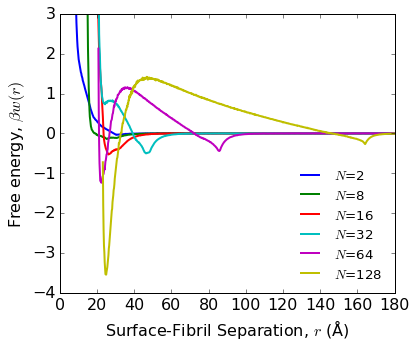

In [44]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [6.0, 5.0]})

from scipy.signal import savgol_filter
for N, d in data[0.25].iteritems():
    if N in [2,8,16,32,64,128]:
        if type(d)!=type(float()):
            plt.plot(d[0], d[1], label='$N$='+str(N), lw=2)
            #plt.plot(d[0], savgol_filter(d[1], 9, 2), lw=2)

plt.legend(loc=0, frameon=False, fontsize='small')
plt.xlabel('Surface-Fibril Separation, $r$ (Å)')
plt.ylabel(r'Free energy, $\beta w(r)$')
plt.ylim((-4,3))
plt.xlim((0,180))
plt.savefig('mc_pmf.pdf', bbox_inches='tight')

### MC: Surface excess at different salt concentrations and fibril lengths

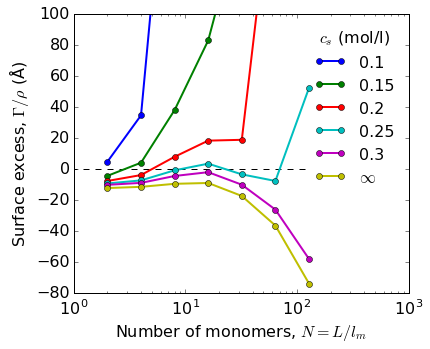

In [48]:
def f(x):
    if type(x)!=type(float()):
        return x[2]
    else:
        return x

plt.plot( [0,128], [0,0], 'k--')

for salt, d in data.iteritems():
    if salt>=0.1 and salt!=0.27:
        _d = d.apply(f)
        plt.plot(_d.keys(), _d.get_values(), label=salt, linestyle='-', marker='o', lw=2, ms=6)

plt.legend(loc=0,frameon=False, fontsize='medium', title=r'$c_{s}$ (mol/l)')
plt.xlabel(r'Number of monomers, $N=L/l_m$')
plt.ylabel(r'Surface excess, $\Gamma/\rho$ (Å)')
plt.xscale('log')
plt.ylim((-80,100))
plt.xlim(1, 1000)
plt.savefig('mc_excess.pdf', bbox_inches='tight')

### Line Segment Model

Here we calculate the surface excess using a simplified model, considering Gouy-Chapman electrostatics and the excluded volume of a rod approaching a planar surface.

(-4, 3)

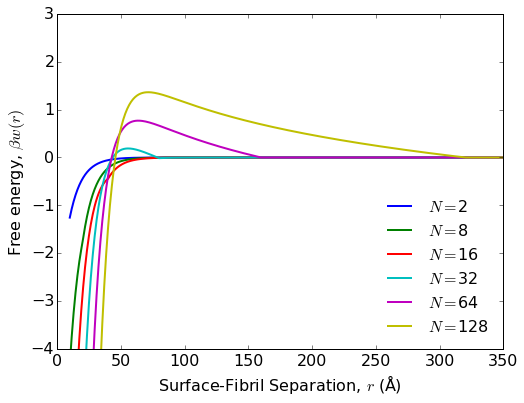

In [3]:
from math import asinh, sqrt, pi
s=10     # closest contact (Å)
lm=5    # monomer length (Å)
zm=2    # monomer charge (e)
lB=7.1  # Bjerrum length (Å)
NA=6.022e23 # Avogadros number (1/mol)

def TdS(r, L):
    """ rod-2-surface excluded volume contribution to free energy (kT) """
    sel = r<0.5*L
    w   = -np.log(2*r[sel]/L)
    return np.concatenate((w, 0*r[~sel]))

for rho in [266]:
    for N in [2,8,16,32,64,128]:# number of monomers
        for salt in [0.1]:        # ionic strength (mol/l)
            L = N*lm              # rod length (Å)
            z = zm*N              # rod charge (e)
            lD = 3.04/sqrt(salt)  # Debye length (Å)
            phi = 2*asinh( (1/rho)*sqrt(pi*lB/(2*salt*NA*1e-27)) ) # surf. potential (kT/e)
            r = np.arange(s, 400, 0.5)
            w = -z * phi * np.exp(-(r+s)/lD) + TdS(r,L)
            gamma = np.trapz( np.expm1(-w), r  )
            plt.plot(r, w, label=r'$N=$'+str(N), lw=2)
            
plt.ylim((-6,3))
plt.legend(loc=0,frameon=False, fontsize='medium')
plt.xlabel('Surface-Fibril Separation, $r$ (Å)')
plt.ylabel(r'Free energy, $\beta w(r)$')
plt.xlim((0,350))
plt.ylim((-4,3))

In [4]:
from pylab import cm,imshow,contour,clabel,colorbar

vmin=-50
vmax=70

x = np.linspace(0.05,0.3, 221) # salt concentration
y = np.linspace(1, 40, 160) # number of monomers
Z = np.ndarray(shape=(y.size,x.size))
rho = 266

for N in y:# number of monomers
    for salt in x:        # ionic strength (mol/l)
        L = N*lm              # rod length (Å)
        z = zm*N              # rod charge (e)
        lD = 3.04/sqrt(salt)  # Debye length (Å)
        phi = 2*asinh( (1/rho)*sqrt(pi*lB/(2*salt*NA*1e-27)) ) # surf. potential (kT/e)
        r = np.arange(0, 1000, 0.2)
        # eq 62. DOI: http://dx.doi.org/10.1016/S0006-3495(02)75375-7
        w = - 2 * z * np.log( ( 1 + np.tanh( phi / 4 ) * np.exp(-(r+s)/lD) ) 
                             / ( 1 - np.tanh( phi / 4 ) * np.exp(-(r+s)/lD) ) ) + TdS(r,L)+ (s/r)**9
        #w = -z * phi * np.exp(-(r+s)/lD) + TdS(r,L)+ (s/r)**9
        exc = np.trapz( np.expm1(-w), r  )
        Z[y.tolist().index(N)][x.tolist().index(salt)]=exc

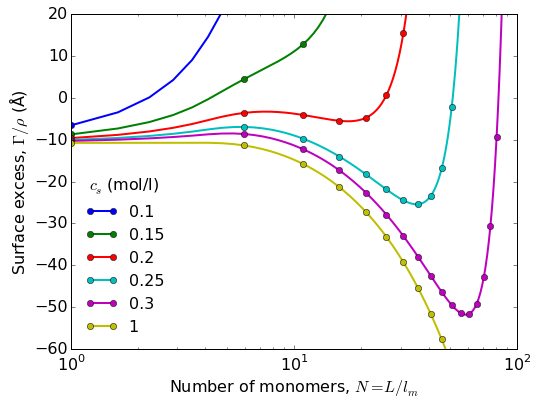

In [6]:
y = np.linspace(1, 100, 160) # number of monomers
salt = [0.1, 0.15, 0.2, 0.25, 0.3, 1]
for cs in salt:
    salt = 0.25  
    Y = []
    X = []
    for N in y:# number of monomers
        L = N*lm              # rod length (Å)
        z = zm*N              # rod charge (e)
        lD = 3.04/sqrt(cs)  # Debye length (Å)
        phi = 2*asinh( (1/rho)*sqrt(pi*lB/(2*salt*NA*1e-27)) ) # surf. potential (kT/e)
        r = np.arange(0, 1000, 0.2)
        w = - 2 * z * np.log( ( 1 + np.tanh( phi / 4 ) * np.exp(-(r+s)/lD) ) 
                             / ( 1 - np.tanh( phi / 4 ) * np.exp(-(r+s)/lD) ) ) + TdS(r,L) + (s/r)**9
        #w = -z * phi * np.exp(-(r+s)/lD) + TdS(r,L) + (s/r)**9
        exc = np.trapz( np.expm1(-w), r  )
        Y.append(N)
        X.append(exc)
    plt.plot(Y,X, label=cs, linestyle='-', marker='o', lw=2, ms=6, markevery = 8)
plt.legend(loc=0,frameon=False, fontsize='medium', title=r'$c_{s}$ (mol/l)')
plt.ylim(-60,20)
plt.xlim(1,100)
plt.xlabel(r'Number of monomers, $N=L/l_m$')
plt.ylabel(r'Surface excess, $\Gamma/\rho$ (Å)')
plt.xscale('log')
plt.savefig('fig/linesegment_excess.png')
plt.show()

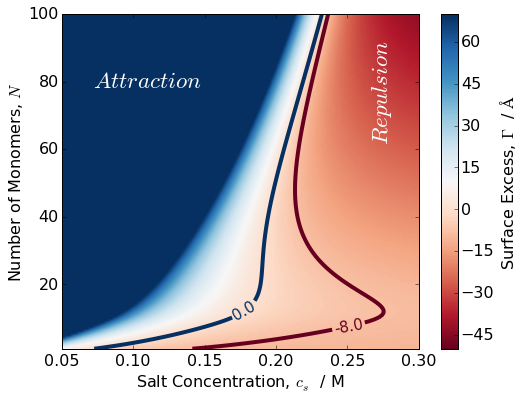

In [19]:
im = imshow(Z,cmap=cm.RdBu,extent=[x.min(),x.max(),y.min(),y.max()],origin='lower',aspect='auto', vmin=vmin, vmax=vmax) 

# contour lines
cset = contour(x,y,Z,(-8,0),linewidths=4,cmap=cm.RdBu)
manual_locations = [(0.25, 10),(0.18, 10)]
clabel(cset,inline=True,fmt='%1.1f',fontsize=15,manual=manual_locations)

plt.figtext(0.18,0.73,'$Attraction$',color='white',fontsize='x-large')
plt.figtext(0.66,0.8,'$Repulsion$',rotation='vertical',color='white',fontsize='x-large')

# labels
colorbar(im,label='Surface Excess, $\Gamma$  / $\AA$') # adding the colorbar on the right
plt.ylabel('Number of Monomers, $N$')
plt.xlabel('Salt Concentration, $c_s$  / M')
plt.savefig('fig/linesegment_exces_map.png')
plt.show()

In [9]:
F50fib = np.loadtxt('./exp/50fib.dat',comments={'T'},usecols=(0,1,6,9))
D50fib = np.loadtxt('./exp/50fib.dat',comments={'T'},usecols=(0,3,7,11))
Fit50fib = np.loadtxt('./exp/50fib.dat',comments={'T'},usecols=(0,2,4,6,8,10,12))

F50mon = np.loadtxt('./exp/50mon.dat',comments={'T'},usecols=(0,1,3,5))
D50mon = np.loadtxt('./exp/50mon.dat',comments={'T'},usecols=(0,2,4,6))

F200fib = np.loadtxt('./exp/200fib.dat',comments={'T'},usecols=(0,3,5,7,9))
D200fib = np.loadtxt('./exp/200fib.dat',comments={'T'},usecols=(0,4,6,8,10))

F200mon = np.loadtxt('./exp/200mon.dat',comments={'T'},usecols=(0,3,5,7))
D200mon = np.loadtxt('./exp/200mon.dat',comments={'T'},usecols=(0,4,6,8))

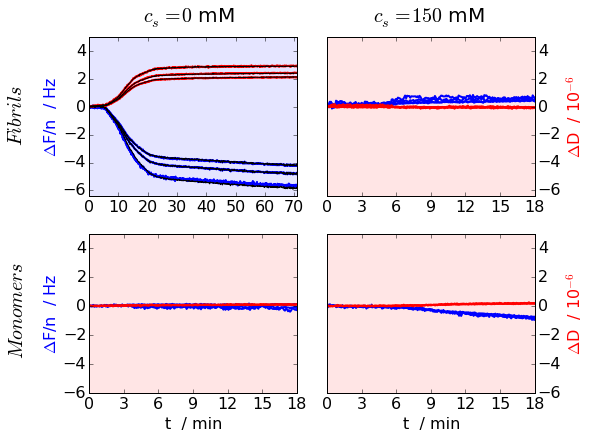

In [17]:
f = plt.figure()

xticks = np.arange(0,19,3)

# 50 mM fibrils
ax = f.add_subplot(221)
ax.patch.set_alpha(0.1)
ax.patch.set_color('b')
plt.ylim([-6.4,5])
ax.text(-28,0.5,'$Fibrils$',rotation=90,fontsize=20)
ax.text(18.5,6,'$c_s = 0$ mM',fontsize=20)
plt.xlim([0,71])
plt.ylabel("$\Delta$F/n  / Hz",color='blue')
plt.plot(F50fib[1:,0]/60,F50fib[1:,:],color='blue', lw=2)
plt.plot(D50fib[1:,0]/60,D50fib[1:,:],color='red', lw=2)
plt.plot(Fit50fib[1:,0]/60,Fit50fib[1:,:],color='black', lw=1)

# 200 mM fibrils
ax = f.add_subplot(222)
plt.xticks(xticks)
ax.patch.set_alpha(0.1)
ax.patch.set_color('r')
ax.text(4,6,'$c_s = 150$ mM',fontsize=20)
ax.yaxis.tick_right()
plt.ylim([-6.4,5])
plt.xlim([0,18])
plt.ylabel("$\Delta$D  / 10$^{-6}$",color='red')
ax.yaxis.set_label_position("right")
plt.plot(F200fib[1:,0]/60,F200fib[1:,:],color='blue', lw=2)
plt.plot(D200fib[1:,0]/60,D200fib[1:,:],color='red', lw=2)

# 50 mM monomers
ax = f.add_subplot(223)
plt.xticks(xticks)
ax.patch.set_alpha(0.1)
ax.patch.set_color('r')
ax.text(-7,2,'$Monomers$',rotation=90,fontsize=20)
plt.ylim([-6,5])
plt.xlim([0,18])
plt.ylabel("$\Delta$F/n  / Hz",color='blue')
plt.xlabel("t  / min")
plt.plot(F50mon[1:,0]/60,F50mon[1:,:],color='blue', lw=2)
plt.plot(D50mon[1:,0]/60,D50mon[1:,:],color='red', lw=2)

# 200 mM monomers
ax = f.add_subplot(224)
plt.xticks(xticks)
ax.patch.set_alpha(0.1)
ax.patch.set_color('r')
ax.yaxis.tick_right()
plt.ylim([-6,5])
plt.xlim([0,18])
plt.ylabel("$\Delta$D  / 10$^{-6}$",color='red')
ax.yaxis.set_label_position("right")
plt.xlabel("t  / min")
plt.plot(F200mon[1:,0]/60,F200mon[1:,:],color='blue', lw=2)
plt.plot(D200mon[1:,0]/60,D200mon[1:,:],color='red', lw=2)

f.tight_layout()
f.savefig('fig/qcm-d.png', bbox_inches='tight', pad_inches=0.3)
plt.show()